## DBSCAN이란?
DBSCAN은 Density-Based Spatial Clustering of Applications with Noise의 줄임말입니다.  
영어 표현 그대로 밀도 기반 클러스터링 방법인데요. DBSCAN의 전제는 다음과 같습니다.

- 어떤 데이터가 특정 클러스터에 속할 경우, 클러스터 내의 다른 데이터들과 가까운 위치에 있어야 한다.

위에서 **다른 많은 데이터**와 **가까운 위치**라는 표현이 나오는데요. DBSCAN은 이 두 가지를 통해 클러스터를 구분합니다.

그렇다면, **얼마나 많은 데이터**와 **얼마나 가까운 위치**에 있어야 하나의 클러스터로 분류될까요?

이 두 가지는 모델 학습 시 임의로 지정해 줘야 하는 값입니다.  
얼마나 가까운 위치에 데이터가 있어야 하는지 나타내는 <span style='color:yellowgreen'> 반경(Radius)</span>,  
반경 내에 얼마나 많은 데이터가 있어야 하는지를 나타내는 <span style='color:yellowgreen'>최소 데이터 개수(Minimum Points)</span>을 어떻게 지정해 주느냐에 따라  
결과가 달라집니다.

DBSCAN의 클러스터링 진행 과정은 다음과 같습니다.

먼저, 특정 데이터에서 지정한 반경 내에 몇 개의 데이터가 포함되는지 탐색합니다.

![이미지1](../1주차_클러스터%20분석/image/DBSCAN/clustering_imgs.001.png)

정해진 반경 내에 최소 데이터 개수가 포함되면 하나의 클러스터로 묶습니다. 만약에, 최소 데이터 개수가 4개라고 하면  
아래 이미지에서는 두 개의 클러스터가 생기게 됩니다.

![이미지2](../1주차_클러스터%20분석/image/DBSCAN/clustering_imgs.002.png)

만들어진 두 개의 클러스터의 경계에 있는 데이터들에서 그린 반경이 서로 겹치는 경우가 생길 수 있는데요,  
그럴 경우에는 두 클러스터를 하나로 묶습니다.

![이미지3](../1주차_클러스터%20분석/image/DBSCAN/clustering_imgs.003.png)

조건에 만족하지 못하고 어떠한 클러스터에도 포함되지 못한 데이터는 이상치(Outlier)가 됩니다.

![이미지4](../1주차_클러스터%20분석/image/DBSCAN/clustering_imgs.004.png)

k-means는 이상치가 Centroid 위치에 관여하면서 결과에 영향을 끼쳤는데요. DBSCAN은 기준에 포함되지 못하는 데이터를  
제외하기 때문에 이상치에 강건(Robust)한 방법입니다.

또, 데이터의 밀도에 따라 클러스터를 만들기 때문에 복잡하거나 기하학적인 형태를 가진 데이터 세트에 효과적입니다.

반면, 고차원 데이터일수록 데이터 간 밀도를 계산하기 어렵고, 연산이 많아져 학습 속도가 느려질 수 있다는 단점도 있습니다.

## DBSCAN 실습
실습을 통해 한 번 확인해 볼게요. 데이터는 sklearn의 데이터 세트인 `make_moons`를 활용하겠습니다.  
`make_moons()`를 사용하면 초승달 모양의 데이터 분포를 생성할 수 있습니다.

<Axes: xlabel='0', ylabel='1'>

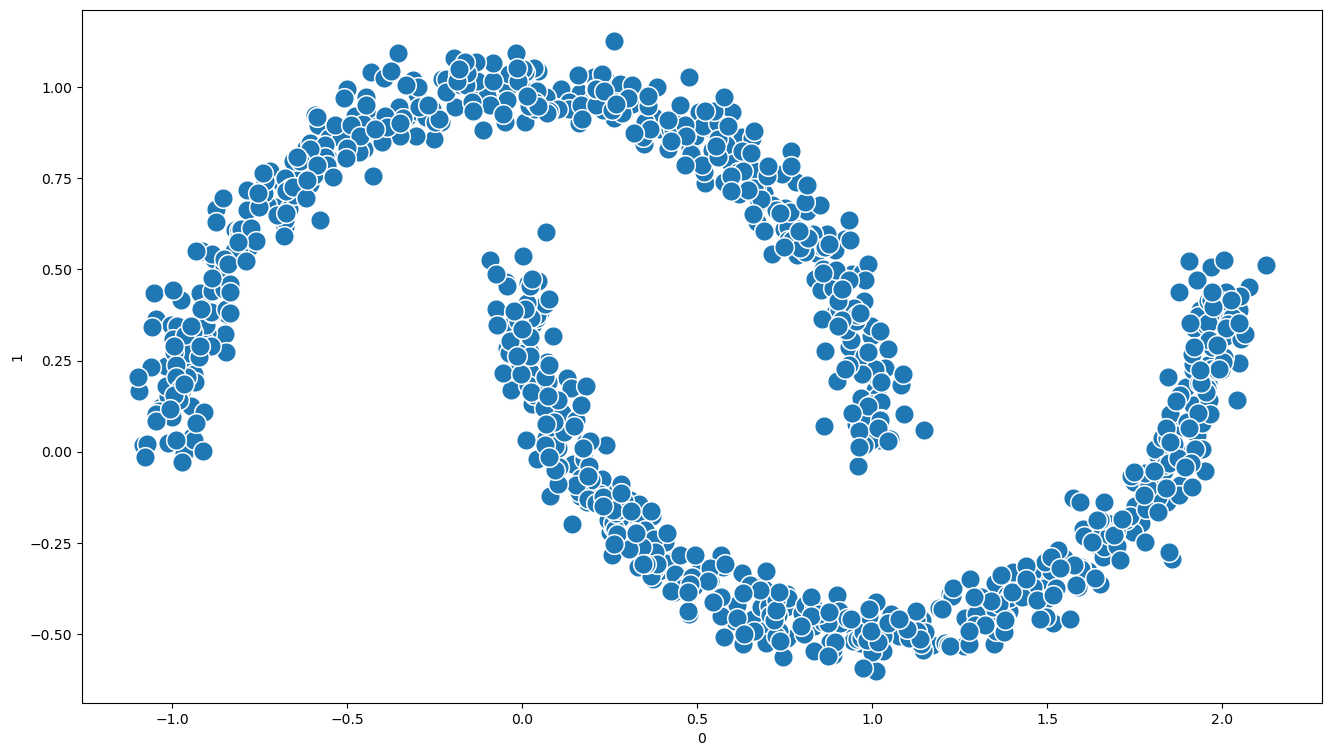

In [6]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)  # noise: 잡음의 크기. 0이면 정확히 반원을 이룸.
df = pd.DataFrame(X)

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)

이 데이터를 k-means와 DBSCAN 각각으로 클러스터링 해 보고 결과를 비교해 볼게요.

먼저 k-means로 클러스터링 해 보겠ㅅ브니다. k는 2로 할게요.

c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

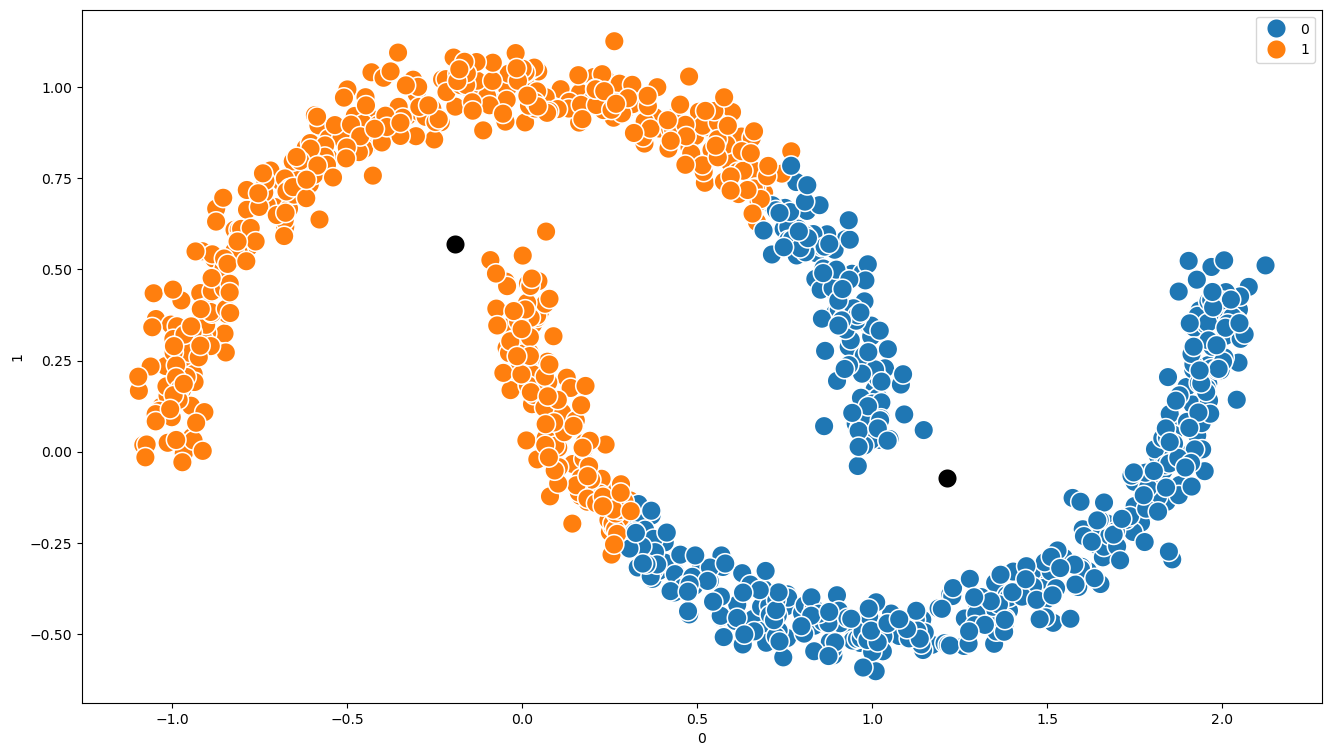

In [7]:
from sklearn.cluster import KMeans

# k-means 모델 학습
model = KMeans(n_clusters=2, random_state=123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 군집의 중심점
centers = model.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(16, 9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

Centroid를 중심으로 가까운 거리의 데이터가 같은 클러스터로 묶였네요. 반달 모양으로 구분된 데이터의 특성이  
잘 반영되지 못했습니다. 

DBSCAN으로도 클러스터링 해볼게요. 일단 `df['kmeans_label']`을 지워줄게요.

In [8]:
df = df.drop(columns=['kmeans_label'], axis=1)

임의로 최소 데이터 개수는 5, 반경은 0.1로 하겠습니다.  
참고로 DBSCAN에서 클러스터링 된 결과를 확인할 때에는 `predict()` 대신 `labels_`속성을 사용합니다.

<Axes: xlabel='0', ylabel='1'>

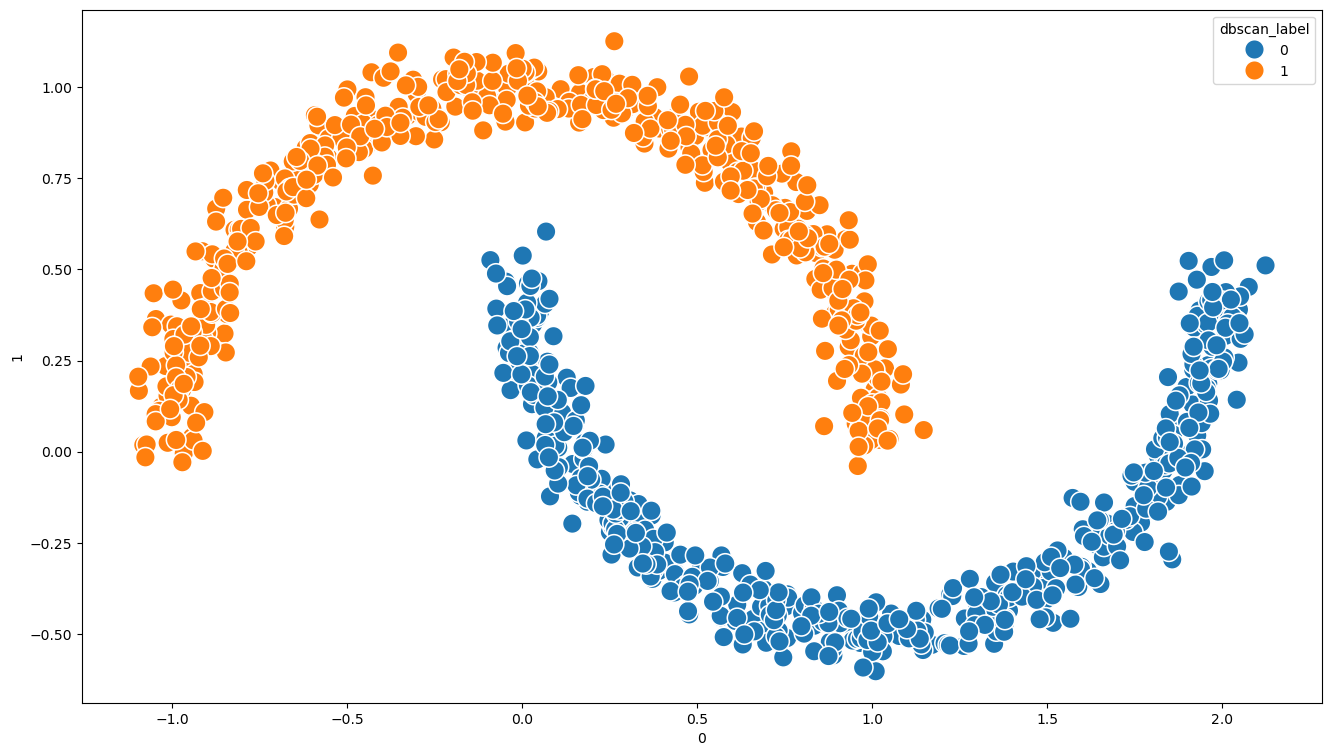

In [9]:
from sklearn.cluster import DBSCAN

eps = 0.1  # 반경
min_samples = 5  # 최소 데이터 개수

# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

클러스터를 두 개의 반달 모양으로 잘 구분했네요. 위 그림처럼 DBSCAN은 기하학적인 분포의 데이터를 클러스터링하는 데 유용합니다.